In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score

In [76]:
df = pd.read_csv('tested.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [77]:
df.shape

(418, 12)

In [78]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

In [79]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [80]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Feature selection

In [81]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [82]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.191514
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

In [83]:
df['family_size'] = df['SibSp'] + df['Parch'] 


In [84]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
family_size    0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000013
Pclass        -0.108615
Name: Survived, dtype: float64

In [85]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)


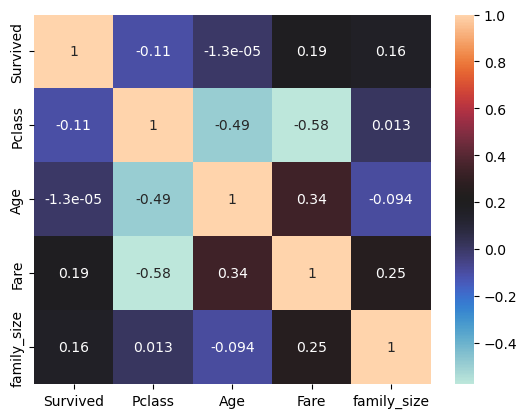

In [86]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df,cmap='icefire',annot=True)
plt.show()

## Imputing missing values

In [87]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23
Embarked,0,0.00
family_size,0,0.00


In [88]:
df.drop(['Cabin'],axis=1,inplace=True)


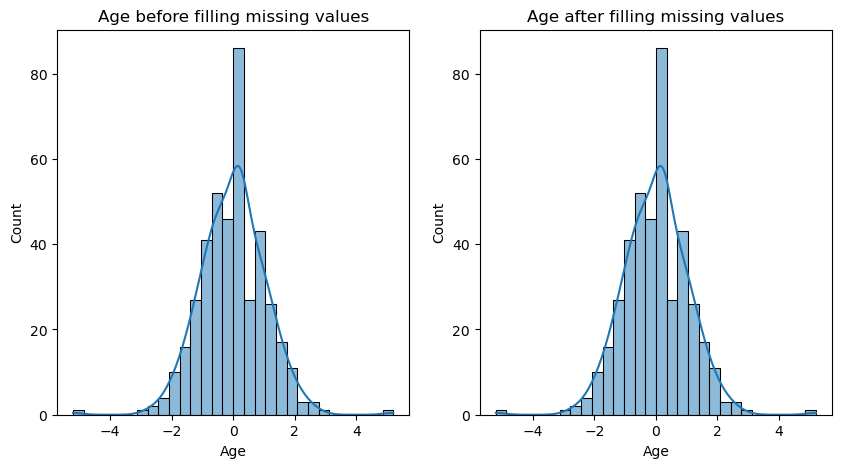

In [116]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Age'],ax=ax[0],kde=True)
sns.histplot(df['Age'].fillna(df['Age'].mean()),ax=ax[1],kde=True)
ax[0].set_title('Age before filling missing values')
ax[1].set_title('Age after filling missing values')
plt.show()

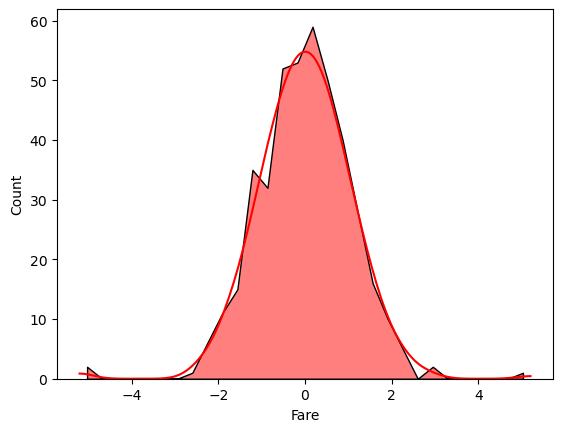

In [114]:
sns.histplot(data=df,x='Fare',kde=True,multiple = "stack", element="poly", color="red")
plt.show()

In [91]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [92]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
Fare,0,0.0
Embarked,0,0.0
family_size,0,0.0


## EDA

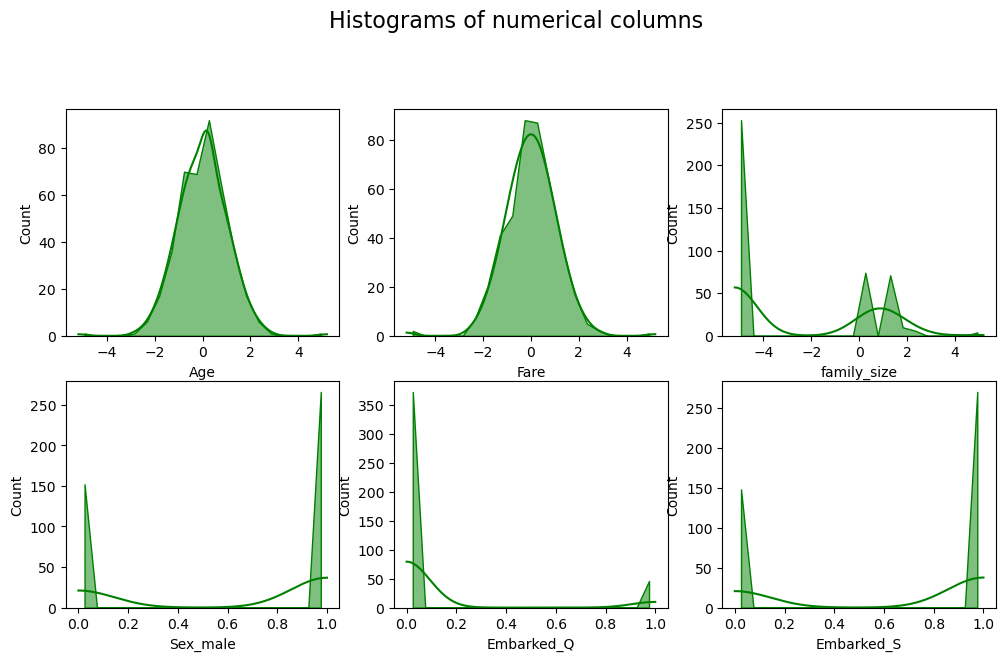

In [110]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i],multiple = "dodge", element="poly", color="green")
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

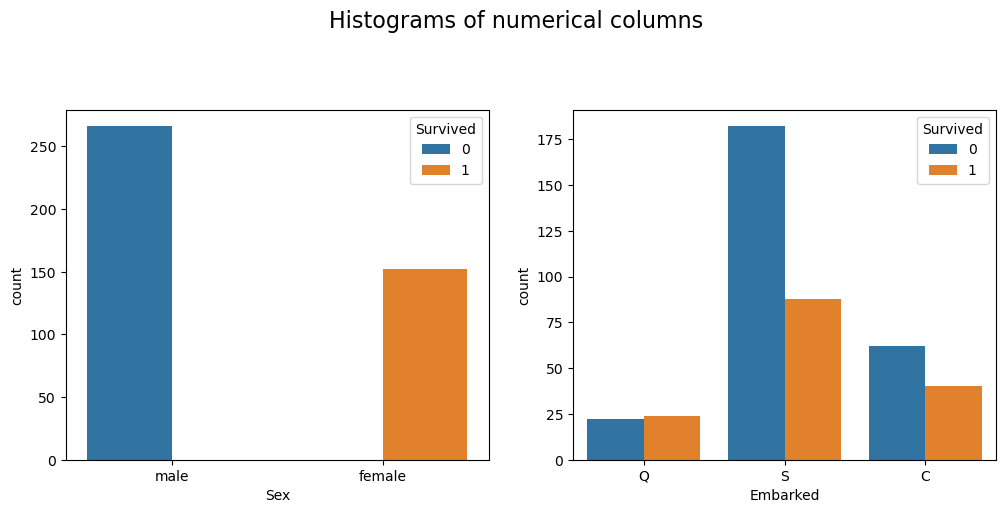

In [94]:
cat_columns=list(df.select_dtypes(include=['object']).columns)
num=int(len(cat_columns)/2) if int(len(cat_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.countplot(data=df,x=cat_columns[0],ax=ax[j][i],hue='Survived')
            cat_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

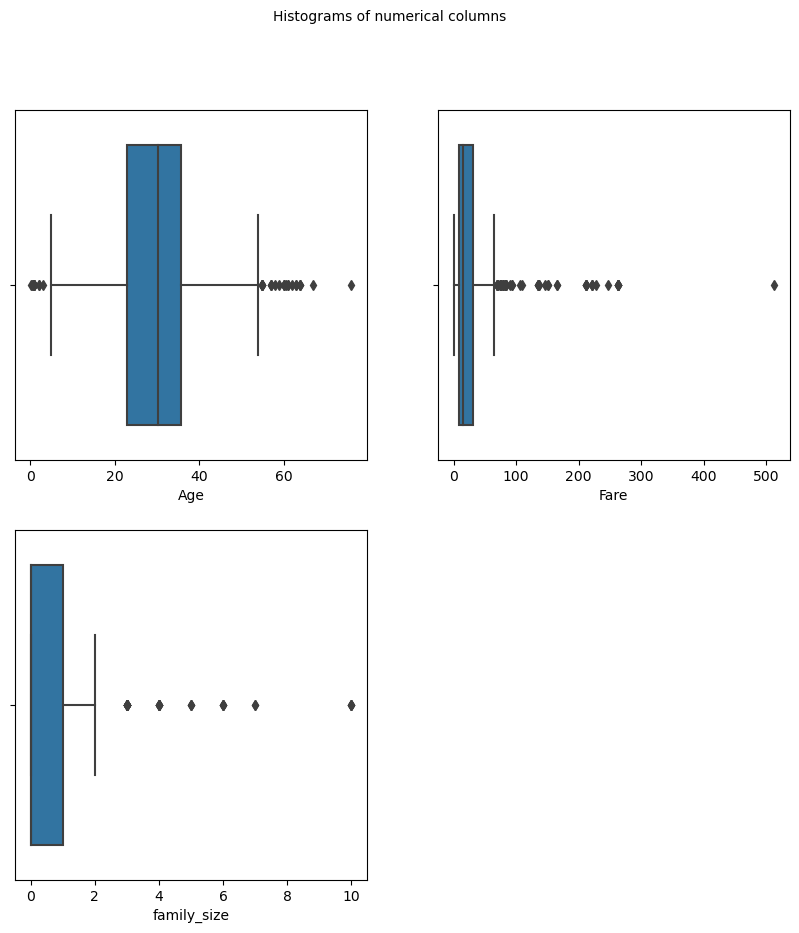

In [95]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(10,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=10)
plt.show()

In [96]:
ft = FunctionTransformer(np.log1p)
qt = QuantileTransformer(output_distribution='normal')
x_f = pd.DataFrame(qt.fit_transform(df[['Fare','Age','family_size']]),columns=['Fare','Age','family_size'])
x_f

C:\Users\SUPRITH\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


,Fare,Age,family_size
0,-0.819555,0.631708,-5.199338
1,-2.097253,1.224872,0.507918
2,-0.333696,2.125161,-5.199338
3,-0.414296,-0.292657,-5.199338
4,-0.227360,-0.758016,1.047294
...,...,...,...
413,-0.511340,0.208892,-5.199338
414,1.479193,0.832236,-5.199338
415,-1.444206,0.802848,-5.199338
416,-0.511340,0.208892,-5.199338


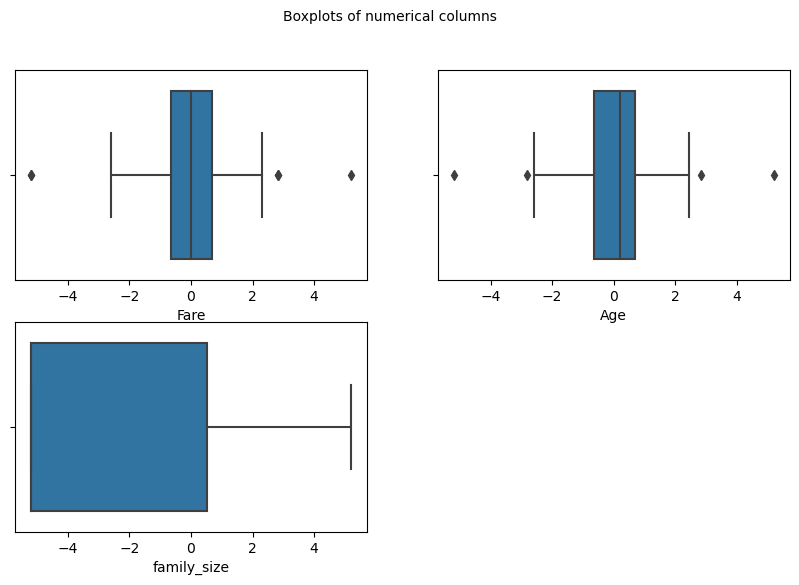

In [97]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(10,6))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=x_f,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=10)
plt.show()

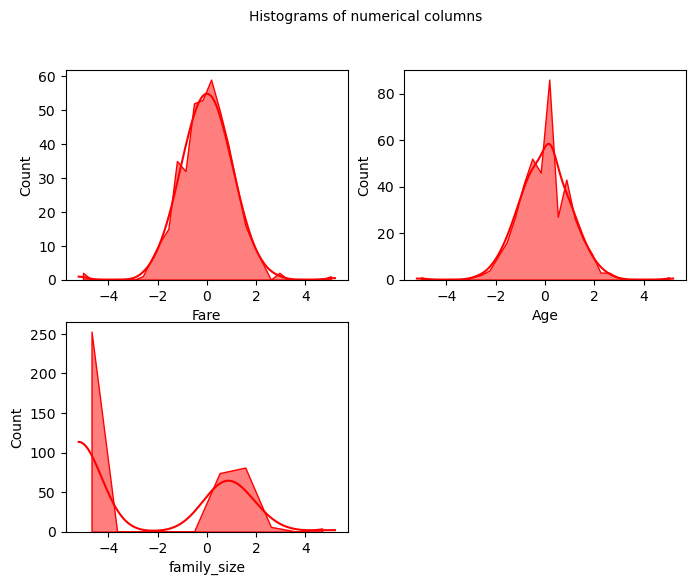

In [118]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(8,6))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=x_f,x=num_columns[0],kde=True,ax=ax[j][i],multiple = "dodge", element="poly", color="red")
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=10)
plt.show()

## Model 

In [99]:
df = pd.get_dummies(df,drop_first=True,dtype='int')


In [100]:
df.head(10)


,Survived,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,0,1,1,0
1,1,3,47.0,7.0000,1,0,0,1
2,0,2,62.0,9.6875,0,1,1,0
3,0,3,27.0,8.6625,0,1,0,1
4,1,3,22.0,12.2875,2,0,0,1
5,0,3,14.0,9.2250,0,1,0,1
6,1,3,30.0,7.6292,0,0,1,0
7,0,2,26.0,29.0000,2,1,0,1
8,1,3,18.0,7.2292,0,0,0,0
9,0,3,21.0,24.1500,2,1,0,1


In [101]:
qt = QuantileTransformer(output_distribution='normal')
df[['Fare','Age','family_size']] = qt.fit_transform(df[['Fare','Age','family_size']])



C:\Users\SUPRITH\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


In [102]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
lg = LogisticRegression(solver='liblinear')
lg.fit(train_X,train_y)
y_pred = lg.predict(test_X)
accuracy_score(test_y,y_pred)

1.0